# Import

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os
import time
import missingno as msno

# Accident Data 

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!ls /content/drive/MyDrive/Accidents/Data
!ls "/content/drive/My Drive/Colab Notebooks/Data/"
Data_Folder_Name="/content/drive/My Drive/Accidents/Data/"

dft-road-casualty-statistics-accident-1979-2021.csv
dft-road-casualty-statistics-casualty-1979-2021.csv
dft-road-casualty-statistics-vehicle-1979-2021.csv
Road-Safety-Open-Dataset-Data-Guide.xlsx
dft-road-casualty-statistics-accident-2020.csv
dft-road-casualty-statistics-casualty-2020.csv
dft-road-casualty-statistics-vehicle-2020.csv
Road-Safety-Open-Dataset-Data-Guide.xlsx


In [4]:
ACC_PATH_ALL =Data_Folder_Name+'dft-road-casualty-statistics-accident-1979-2021.csv'
print(ACC_PATH_ALL)
#ACC_PATH_ALL ='Data/dft-road-casualty-statistics-accident-1979-2021.csv'

acc_df = (pd.read_csv(ACC_PATH_ALL, parse_dates=["date"])
      [lambda x: x['accident_year'] == 2021])
# check if this solution can solve it easier using callables :  
#from https://stackoverflow.com/questions/28239529/conditional-row-read-of-csv-in-pandas
acc_df.head()

/content/drive/My Drive/Accidents/Data/dft-road-casualty-statistics-accident-1979-2021.csv


<ipython-input-4-7048c65403cd>:5: DtypeWarning: Columns (0,2,15,16,35) have mixed types. Specify dtype option on import or set low_memory=False.
  acc_df = (pd.read_csv(ACC_PATH_ALL, parse_dates=["date"])
<ipython-input-4-7048c65403cd>:5: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  acc_df = (pd.read_csv(ACC_PATH_ALL, parse_dates=["date"])


,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,...,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location
8602824,2021010287148,2021,10287148,521508.0,193079.0,-0.246102,51.623425,1,3,3,...,0,4,7,4,1,0,1,1,2,E01000263
8602825,2021010287149,2021,10287149,535379.0,180783.0,-0.050574,51.509767,1,2,2,...,5,4,1,1,0,0,1,1,2,E01004303
8602826,2021010287151,2021,10287151,529701.0,170398.0,-0.136152,51.417769,1,2,2,...,5,4,1,1,0,0,1,1,2,E01003146
8602827,2021010287155,2021,10287155,525312.0,178385.0,-0.196411,51.490536,1,1,1,...,4,4,1,1,0,0,1,1,2,E01002847
8602828,2021010287157,2021,10287157,512144.0,171526.0,-0.388169,51.431649,1,3,4,...,0,4,1,1,0,0,1,1,2,E01002608


In [4]:
colnames=['accident_year','date','longitude','latitude', 'accident_severity','number_of_vehicles','number_of_casualties','day_of_week','time']
ACC_PATH_ALL =Data_Folder_Name+'dft-road-casualty-statistics-accident-1979-2021.csv'
print(ACC_PATH_ALL)
#ACC_PATH_ALL ='Data/dft-road-casualty-statistics-accident-1979-2021.csv'

timeline_df = (pd.read_csv(ACC_PATH_ALL, usecols=colnames)
      [lambda x: x['accident_year'] >= 2016])
# check if this solution can solve it easier using callables :  
#from https://stackoverflow.com/questions/28239529/conditional-row-read-of-csv-in-pandas
timeline_df.head()

/content/drive/My Drive/Accidents/Data/dft-road-casualty-statistics-accident-1979-2021.csv


,accident_year,longitude,latitude,accident_severity,number_of_vehicles,number_of_casualties,date,day_of_week,time
8004851,2016,-0.279323,51.584754,3,2,1,01/11/2016,3,02:30
8004852,2016,0.184928,51.449595,3,1,1,01/11/2016,3,00:37
8004853,2016,-0.473837,51.543563,3,1,1,01/11/2016,3,01:25
8004854,2016,-0.164442,51.404958,3,1,1,01/11/2016,3,09:15
8004855,2016,-0.406580,51.483139,3,2,1,01/11/2016,3,07:53


In [5]:
timeline_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 699060 entries, 8004851 to 8703910
Data columns (total 9 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   accident_year         699060 non-null  int64  
 1   longitude             698910 non-null  float64
 2   latitude              698910 non-null  float64
 3   accident_severity     699060 non-null  int64  
 4   number_of_vehicles    699060 non-null  int64  
 5   number_of_casualties  699060 non-null  int64  
 6   date                  699060 non-null  object 
 7   day_of_week           699060 non-null  int64  
 8   time                  699060 non-null  object 
dtypes: float64(2), int64(5), object(2)
memory usage: 53.3+ MB


In [48]:
timeline_df.sample(10)

,accident_year,longitude,latitude,accident_severity,number_of_vehicles,number_of_casualties,date,day_of_week,time,hour,weekend,month,time_of_day,accident_level
8010497,2016,-0.162142,51.354742,3,2,2,2016-05-09,2,19:09,19,0,5,4,0
8470843,2019,0.310987,51.600064,3,2,5,2019-03-30,7,18:36,18,1,3,3,0
8697315,2021,-3.008045,53.054379,3,1,1,2021-12-10,3,15:59,15,0,12,3,0
8010817,2016,-0.222336,51.487774,2,2,1,2016-08-09,5,16:40,16,0,8,3,1
8291536,2018,-0.144058,51.521148,2,3,1,2018-10-20,7,11:55,11,1,10,2,1
8181246,2017,-2.454682,53.269679,3,1,1,2017-04-12,2,08:30,8,0,4,1,0
8549896,2020,-0.016570,53.545863,3,2,1,2020-04-05,2,18:25,18,0,4,3,0
8625843,2021,-3.249805,54.755890,2,2,1,2021-01-27,4,08:58,8,0,1,1,1
8313740,2018,-1.206236,54.485710,3,2,1,2018-02-07,2,11:50,11,0,2,2,0
8517963,2020,-0.164406,51.477180,2,1,2,2020-05-15,6,00:45,0,0,5,4,1


In [6]:
d64 = dict.fromkeys(timeline_df.select_dtypes(np.int64).columns, np.int32)
timeline_df = timeline_df.astype(d64)
#converting date to datetime format
timeline_df['date'] = pd.to_datetime((timeline_df['date']))#, format= "%Y-%m-%d")
timeline_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 699060 entries, 8004851 to 8703910
Data columns (total 9 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   accident_year         699060 non-null  int32         
 1   longitude             698910 non-null  float64       
 2   latitude              698910 non-null  float64       
 3   accident_severity     699060 non-null  int32         
 4   number_of_vehicles    699060 non-null  int32         
 5   number_of_casualties  699060 non-null  int32         
 6   date                  699060 non-null  datetime64[ns]
 7   day_of_week           699060 non-null  int32         
 8   time                  699060 non-null  object        
dtypes: datetime64[ns](1), float64(2), int32(5), object(1)
memory usage: 40.0+ MB


<ipython-input-6-b58af222a738>:4: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  timeline_df['date'] = pd.to_datetime((timeline_df['date']))#, format= "%Y-%m-%d")


In [7]:
timeline_df.sample(10)

,accident_year,longitude,latitude,accident_severity,number_of_vehicles,number_of_casualties,date,day_of_week,time
8013033,2016,0.265179,51.532608,3,1,2,2016-10-22,7,00:35
8465888,2019,1.176974,52.048770,3,2,1,2019-05-04,6,19:16
8116765,2016,-0.224843,50.831685,3,3,1,2016-11-18,6,19:15
8300189,2018,-2.592197,53.614077,3,2,1,2018-05-29,3,17:00
8689881,2021,-3.804601,50.272490,2,2,3,2021-07-08,7,22:53
8103499,2016,-1.386458,50.948089,3,2,1,2016-02-11,4,08:15
8071049,2016,-1.471679,52.519722,3,2,2,2016-07-24,1,12:37
8365786,2018,0.490173,51.288315,3,2,1,2018-02-22,5,15:14
8620139,2021,0.009074,51.465216,3,2,2,2021-10-10,1,01:30
8675300,2021,-0.628168,51.393258,3,2,1,2021-09-12,5,12:09


No. of rows: 699060
No. of cols: 10


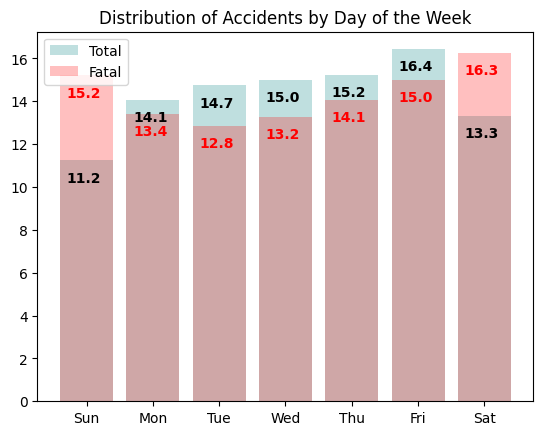

In [15]:
print("No. of rows: {}".format(timeline_df.shape[0]))
print("No. of cols: {}".format(timeline_df.shape[1]))
Day_of_Week_F = timeline_df["day_of_week"].loc[timeline_df["accident_severity"]==1].value_counts().sort_index()/len(timeline_df.loc[timeline_df["accident_severity"]==1])*100
Day_of_Week_D = timeline_df["day_of_week"].value_counts().sort_index()/len(timeline_df)*100
Day_of_Week_D.index = ["Sun", "Mon", "Tue", "Wed", "Thu", "Fri", "Sat"]
plt.bar(Day_of_Week_D.index, Day_of_Week_D.values, alpha=0.25, color="teal",label='Total')
plt.bar(Day_of_Week_D.index, Day_of_Week_F.values, alpha=0.25, color="red",label='Fatal')
plt.title("Distribution of Accidents by Day of the Week")
for i, val in enumerate(Day_of_Week_D.values):
    plt.text(i-0.3, val-1,  str( "{:.{}f}".format( val, 1 )), color='black', fontweight='bold')
for i, val in enumerate(Day_of_Week_F.values):
    plt.text(i-0.3, val-1,  str( "{:.{}f}".format( val, 1 )), color='red', fontweight='bold')
plt.legend()


In [16]:
timeline_df["date"] = pd.to_datetime(timeline_df["date"])
timeline_df["hour"] = timeline_df.time.str[0:2]
timeline_df['hour'] = timeline_df['hour'].astype('int')

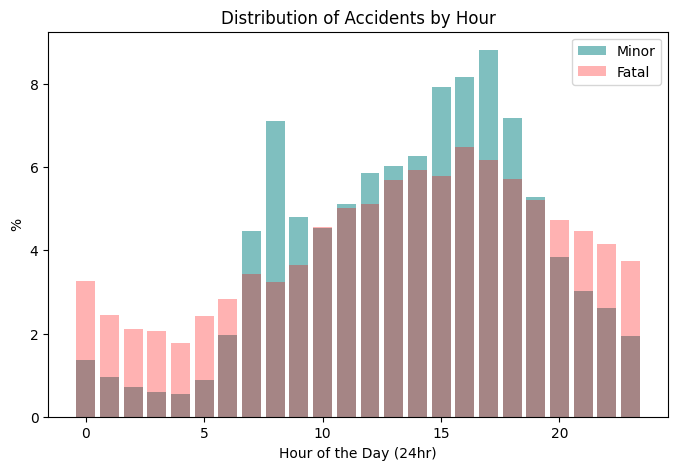

In [17]:
Acc_By_Hour = timeline_df["hour"].loc[timeline_df["accident_severity"]==3].value_counts().sort_index()
Acc_By_Hour = (Acc_By_Hour/Acc_By_Hour.sum())*100
Acc_By_Hour_By_Fatal = timeline_df["hour"].loc[timeline_df["accident_severity"]==1].value_counts().sort_index()
Acc_By_Hour_By_Fatal = (Acc_By_Hour_By_Fatal/Acc_By_Hour_By_Fatal.sum())*100
plt.figure(1, figsize=(8,5))
plt.bar(Acc_By_Hour.index, Acc_By_Hour.values, alpha=0.5, color="teal", label='Minor')
plt.bar(Acc_By_Hour.index, Acc_By_Hour_By_Fatal.values, alpha=0.3, color="red", label='Fatal')
plt.title("Distribution of Accidents by Hour")
plt.ylabel("%")
plt.xlabel("Hour of the Day (24hr)")
plt.legend()


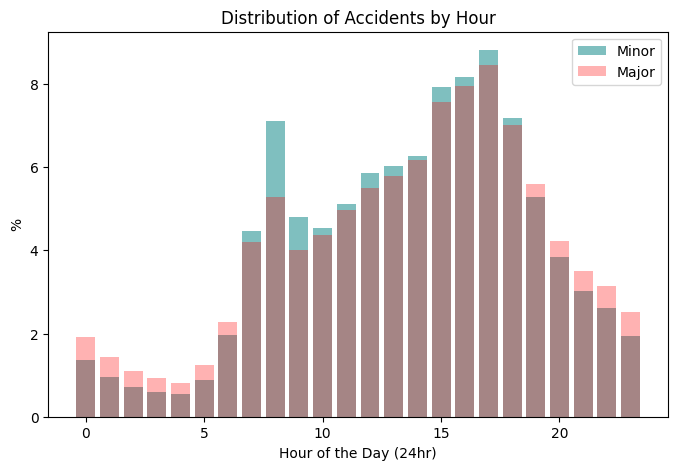

In [19]:
Acc_By_Hour = timeline_df["hour"].loc[timeline_df["accident_severity"]==3].value_counts().sort_index()
Acc_By_Hour = (Acc_By_Hour/Acc_By_Hour.sum())*100
Acc_By_Hour_By_Fatal = timeline_df["hour"].loc[timeline_df["accident_severity"]<3].value_counts().sort_index()
Acc_By_Hour_By_Fatal = (Acc_By_Hour_By_Fatal/Acc_By_Hour_By_Fatal.sum())*100
plt.figure(1, figsize=(8,5))
plt.bar(Acc_By_Hour.index, Acc_By_Hour.values, alpha=0.5, color="teal", label='Minor')
plt.bar(Acc_By_Hour.index, Acc_By_Hour_By_Fatal.values, alpha=0.3, color="red", label='Major')
plt.title("Distribution of Accidents by Hour")
plt.ylabel("%")
plt.xlabel("Hour of the Day (24hr)")
plt.legend()

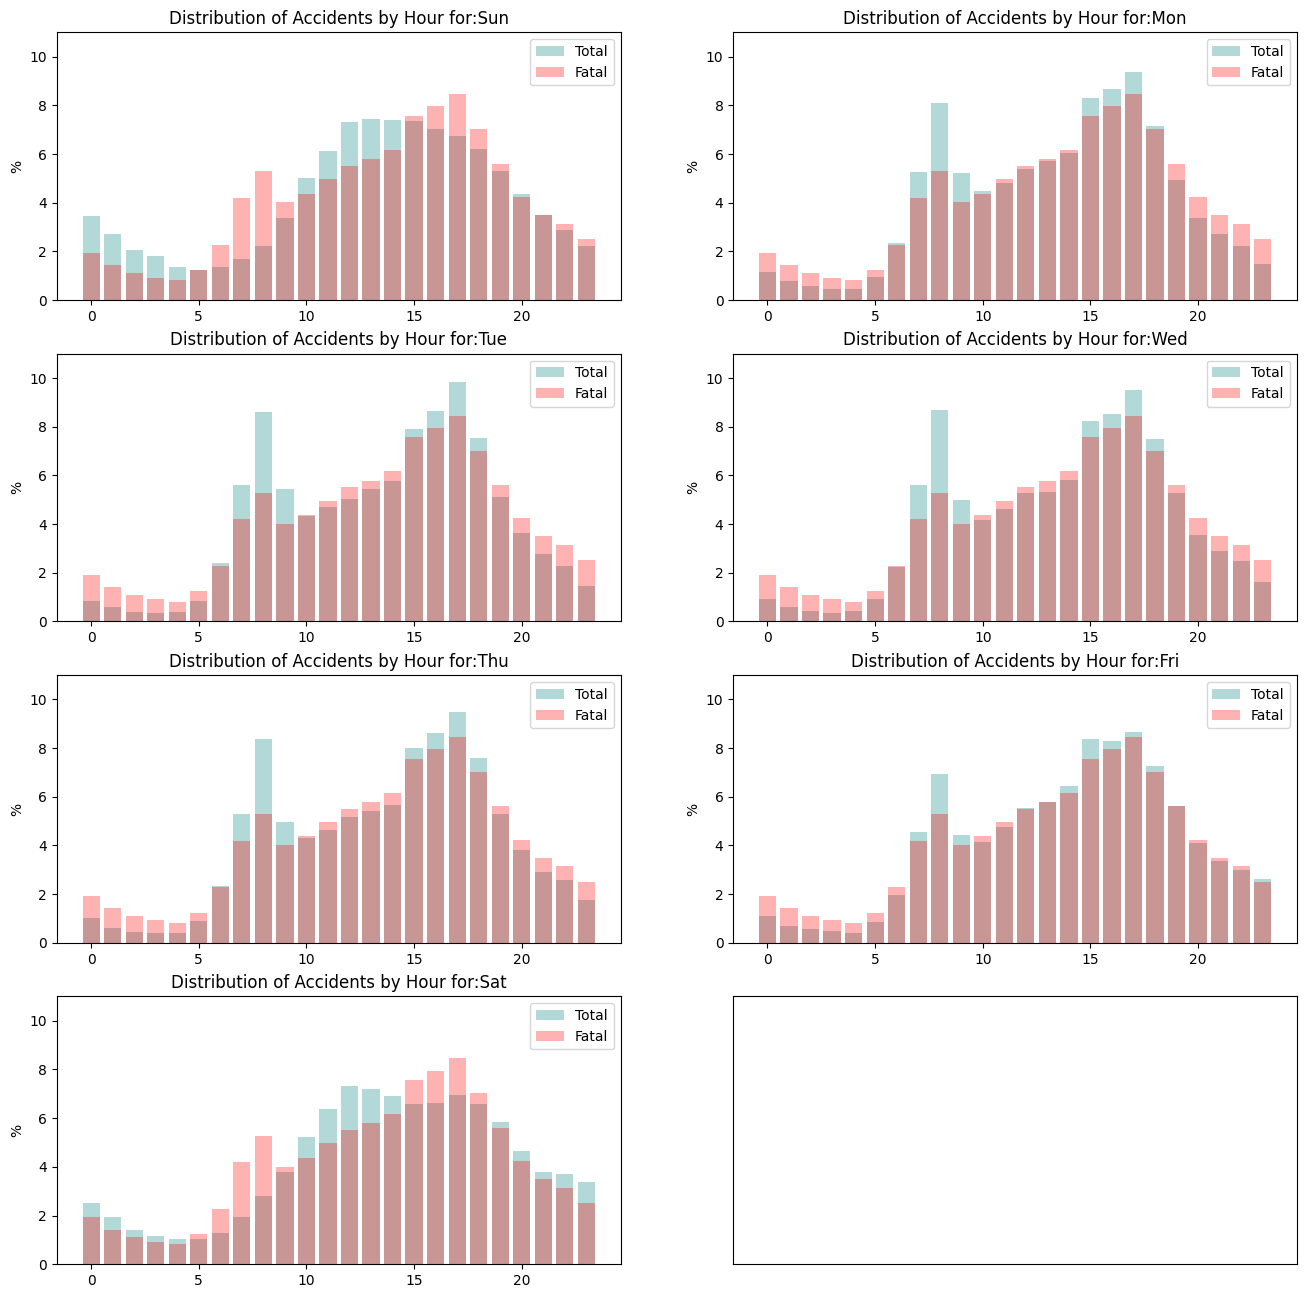

In [20]:
Day_Of_Week_Dict = {1:"Sun", 2:"Mon", 3:"Tue", 4:"Wed", 5:"Thu", 6:"Fri", 7:"Sat"}

fig, ax = plt.subplots(nrows=4, ncols=2, figsize=(16,16))
count = 0

for i, col in enumerate(timeline_df["day_of_week"].sort_values().unique()):
    Acc_By_Hour_By_Day = timeline_df["hour"].loc[timeline_df["day_of_week"]==col].value_counts().sort_index()
    Acc_By_Hour_By_Day = (Acc_By_Hour_By_Day/Acc_By_Hour_By_Day.sum())*100

    Acc_By_Hour_Fatal = timeline_df["hour"].loc[(timeline_df["day_of_week"]==col) & (timeline_df["accident_severity"]==1)].value_counts().sort_index()
    Acc_By_Hour_Fatal = (Acc_By_Hour_Fatal/Acc_By_Hour_Fatal.sum())*100
    
    ax[i//2, count].bar(Acc_By_Hour_By_Day.index, Acc_By_Hour_By_Day.values, alpha=0.3, color="teal", label='Total')
    ax[i//2, count].bar(Acc_By_Hour.index, Acc_By_Hour_By_Fatal.values, alpha=0.3, color="red", label='Fatal')

    ax[i//2, count].title.set_text("Distribution of Accidents by Hour for:" + str(Day_Of_Week_Dict.get(col)))
    ax[i//2, count].set_ylim([0,11])
    ax[i//2, count].set_ylabel("%")
    ax[i//2, count].legend()

    count = count + 1
    if count == 2: count = 0
        
ax[3,1].set_yticks([])
ax[3,1].set_xticks([])
plt.show()


visual inspection:
weekdays and weekend have two various distribution (friday night is in between the two)  make sense to reduce it to weekend weekdays

In [21]:
#new_weekend column
timeline_df['weekend'] = np.where(timeline_df['day_of_week'].isin([1,7]), 1, 0)   # 1 is Sunday , 7 is Saturday
#new month column
timeline_df['month'] = timeline_df ['date'].apply(lambda time: time.month)
#time of day dictionary
timeofdaygroups = {1: "Morning Rush (6-10)",
                   2: "Noon (10-14)",
                   3: "Evening Rush (14-19)",
                   4: "Night (19-6)"}
def daygroup(hour):
    if hour >= 6 and hour < 10:
        return 1
    elif hour >= 10 and hour < 14:
        return 2
    elif hour >= 14 and hour < 19:
        return 3
    else:
        return "4" 
timeline_df['time_of_day'] = timeline_df['hour'].apply(daygroup)

timeline_df.sample(20)

,accident_year,longitude,latitude,accident_severity,number_of_vehicles,number_of_casualties,date,day_of_week,time,hour,weekend,month,time_of_day
8674804,2021,-1.198555,51.868006,3,2,2,2021-10-21,5,16:15,16,0,10,3
8597200,2020,-2.987466,51.581851,2,2,2,2020-11-17,3,10:40,10,0,11,2
8616321,2021,-0.088990,51.505732,3,2,1,2021-08-17,3,21:20,21,0,8,4
8608635,2021,-0.096019,51.440442,3,2,1,2021-04-29,5,06:30,6,0,4,1
8043804,2016,-1.406462,54.905352,2,2,1,2016-07-28,5,14:45,14,0,7,3
8107388,2016,-0.769301,51.333622,3,2,1,2016-05-11,7,19:05,19,1,5,4
8128666,2016,-3.791746,53.280744,3,2,1,2016-01-07,6,12:00,12,0,1,2
8169025,2017,-2.928415,54.850217,3,1,1,2017-08-18,6,07:40,7,0,8,1
8577326,2020,-1.441333,50.937366,3,2,1,2020-09-03,2,21:34,21,0,9,4
8005361,2016,-0.253094,51.609995,3,2,1,2016-07-11,2,09:50,9,0,7,1


In [22]:
# number_of_vehicles
timeline_df['number_of_vehicles'].value_counts() / timeline_df.shape[0] * 100
#timeline_df['number_of_vehicles'].dtypes
#timeline_df['number_of_vehicles'] = timeline_df['number_of_vehicles'].astype('object')

2     61.172575
1     28.938861
3      7.582039
4      1.692702
5      0.402684
6      0.123738
7      0.050353
8      0.018739
9      0.008583
10     0.004435
11     0.001717
12     0.000858
13     0.000858
16     0.000572
14     0.000429
15     0.000286
23     0.000143
24     0.000143
18     0.000143
17     0.000143
Name: number_of_vehicles, dtype: float64

In [23]:
#new_column_accident_seriousness
timeline_df['accident_level'] = timeline_df['accident_severity']
timeline_df['accident_level'] = timeline_df['accident_level'].replace(to_replace = 3, value = 0)
timeline_df['accident_level'] = timeline_df['accident_level'].replace(to_replace = 2, value = 1)
timeline_df['accident_level'] = timeline_df['accident_level'].replace(to_replace = 1, value = 1)
timeline_df.shape

(699060, 14)

In [29]:
def groupby_accidents(df, column):
    col_agg = df.groupby(column).number_of_casualties.agg(['sum', 'count', 'mean'])
    col_agg.reset_index(inplace = True)
    col_agg.sort_values(by = column, inplace = True)
    return col_agg

In [32]:
year_agg = groupby_accidents(timeline_df, 'accident_year')
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot

data = go.Scatter(x = year_agg['accident_year'], y=year_agg['sum'], mode="lines+markers", name='Number of Casualties', 
                  line= dict(color = ('rgb(255,165,0)'), width=4), showlegend = True)
layout = go.Layout(title='<b> Records of Road Accidents (Casualties per year) in UK between 2016 - 2021 <b>',
                   xaxis=dict(title='<b> Years <b>',titlefont=dict(size=16, color='#7f7f7f')),
                   yaxis=dict(title='<b> Number of Casualties <b>',titlefont=dict(size=16,color='#7f7f7f'))
                 )
fig = go.Figure(data=data, layout = layout)
fig.update_xaxes(dtick=1)

iplot(fig)

In [33]:
network_agg = groupby_accidents(timeline_df, 'accident_severity').sort_values(by = 'sum', ascending = False)
network_agg  # for each severity

,accident_severity,sum,count,mean
2,3,716263,560074,1.278872
1,2,177618,129421,1.372405
0,1,16044,9565,1.677365


In [34]:
network_agg = groupby_accidents(timeline_df, 'accident_level').sort_values(by = 'sum', ascending = False)
network_agg  # for each severity

,accident_level,sum,count,mean
0,0,716263,560074,1.278872
1,1,193662,138986,1.393392


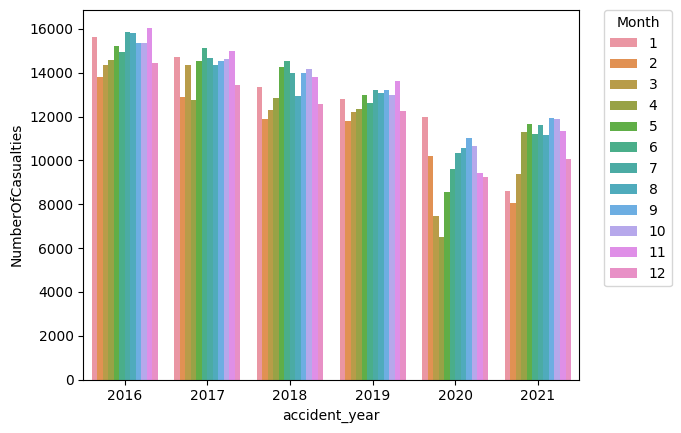

In [70]:
plt.style.use('default')

df = timeline_df.groupby(['accident_year', 'month']).agg(NumberOfCasualties=("number_of_casualties", 'sum'))

df = df.reset_index()

sns.barplot(x="accident_year",

            y='NumberOfCasualties',

            hue="month",

            data=df)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0,title='Month')
plt.show()

In [57]:
## UK Lockdown 23 march 2020 till 29 march 2021
timeline_df['covid']=((timeline_df['date']> '2020-03-23')&(timeline_df['date']< '2021-03-29')).astype(int)
#data["Time"].isin(['07','08','09','15','16','17','18']).astype(int)
date_range = str(timeline_df['date'].dt.date.min()) + ' to ' +str(timeline_df['date'].dt.date.max())
timeline_df[['date','covid']].sample(20)

,date,covid
8650110,2021-05-06,0
8082207,2016-04-05,0
8122999,2016-06-19,0
8575472,2020-09-08,1
8683461,2021-03-09,1
8394244,2019-04-01,0
8537313,2020-12-27,1
8672923,2021-03-26,1
8312644,2018-10-18,0
8442126,2019-10-06,0


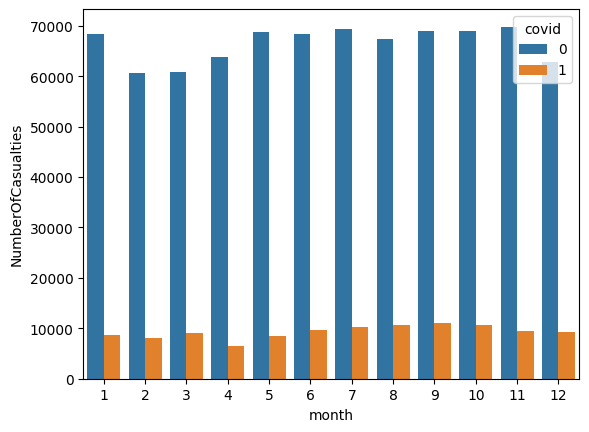

In [72]:
plt.style.use('default')

df = timeline_df.groupby(['covid', 'month']).agg(NumberOfCasualties=("number_of_casualties", 'sum'))


df = df.reset_index()

sns.barplot(x="month",

            y='NumberOfCasualties',

            hue="covid",

            data=df)
#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()

In [73]:
df = timeline_df.groupby(['covid', 'accident_severity']).agg({"number_of_casualties": 'sum'})
#df.groupby(['state', 'office_id']).agg({'sales': 'sum'})
df['%'] = 100 * df['number_of_casualties'] / df.groupby('accident_severity')['number_of_casualties'].transform('sum')
df

number_of_casualties          %
covid accident_severity                                 
0     1                                 13944  86.910995
      2                                153569  86.460269
      3                                630771  88.064161
1     1                                  2100  13.089005
      2                                 24049  13.539731
      3                                 85492  11.935839

In [74]:
df['%%'] = 100 * df['number_of_casualties'] / df.groupby('covid')['number_of_casualties'].transform('sum')
df
##https://stackoverflow.com/questions/23377108/pandas-percentage-of-total-with-groupby


number_of_casualties          %         %%
covid accident_severity                                            
0     1                                 13944  86.910995   1.746747
      2                                153569  86.460269  19.237389
      3                                630771  88.064161  79.015864
1     1                                  2100  13.089005   1.881029
      2                                 24049  13.539731  21.541369
      3                                 85492  11.935839  76.577601

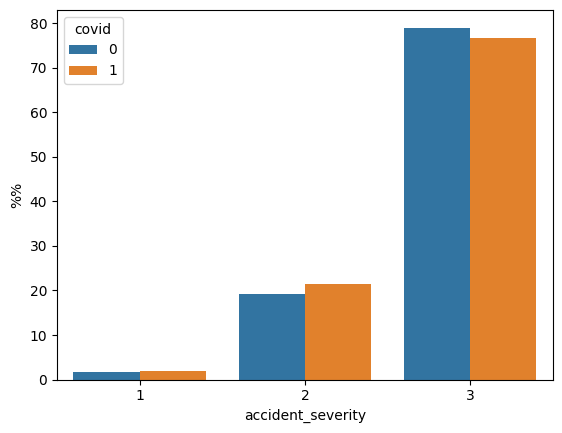

In [76]:
df = df.reset_index()

sns.barplot(x="accident_severity",

            y='%%',

            hue="covid",

            data=df)
#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()

Text(0.5, 1.0, 'Number of accidents per day')

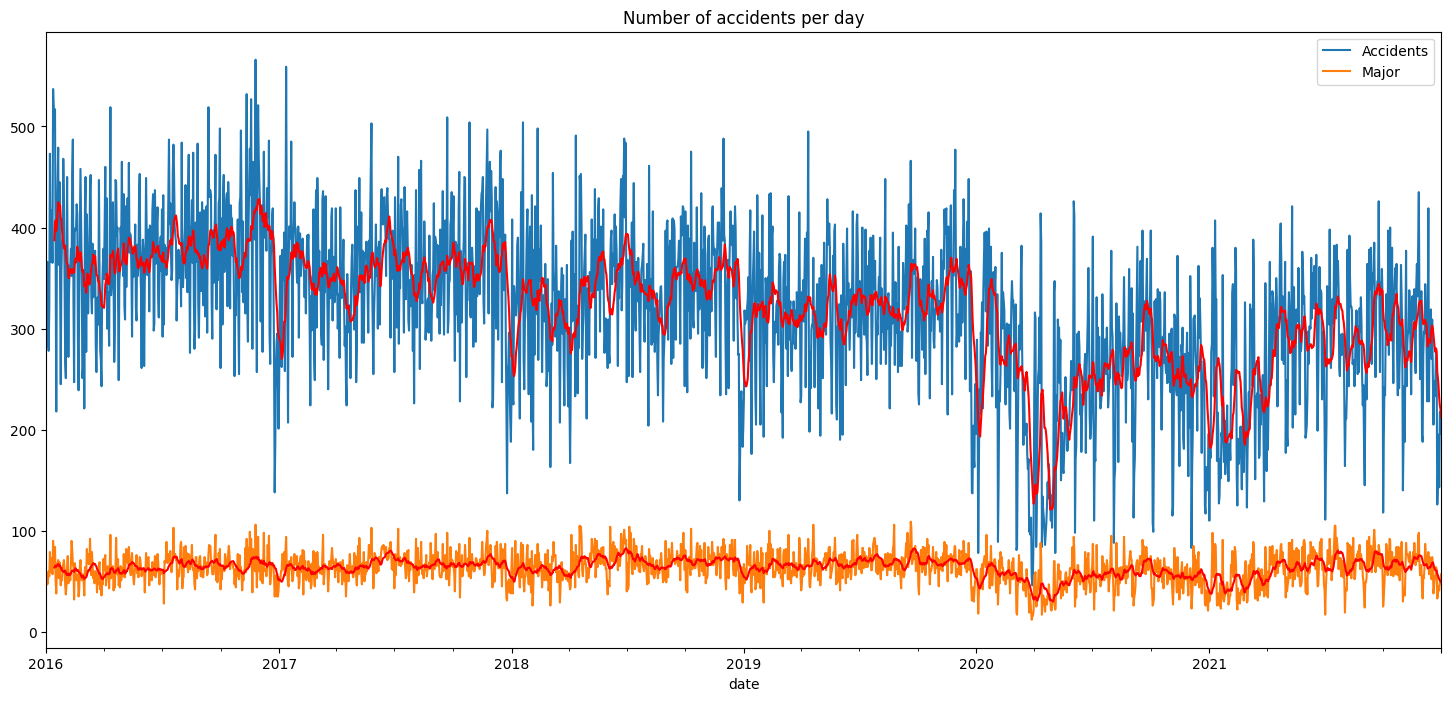

In [67]:
ts_df = pd.DataFrame()
ts_df["Accidents"]=timeline_df.groupby("date")['accident_severity'].count()

timeline_df['Major'] = timeline_df['accident_severity'].mask(
    timeline_df['accident_severity']==3)
ts_df["Major"]=timeline_df.groupby(['date'])['Major'].count()

rolling_att = ts_df["Major"].rolling(window=14).mean()
rolling_acc= ts_df["Accidents"].rolling(window=14).mean()

ts_df['Accidents'].plot(figsize=(18,8), legend=True)
rolling_acc.plot(color='red')

ts_df['Major'].plot(figsize=(18,8), legend=True)
rolling_att.plot(color='red')
plt.title("Number of accidents per day")


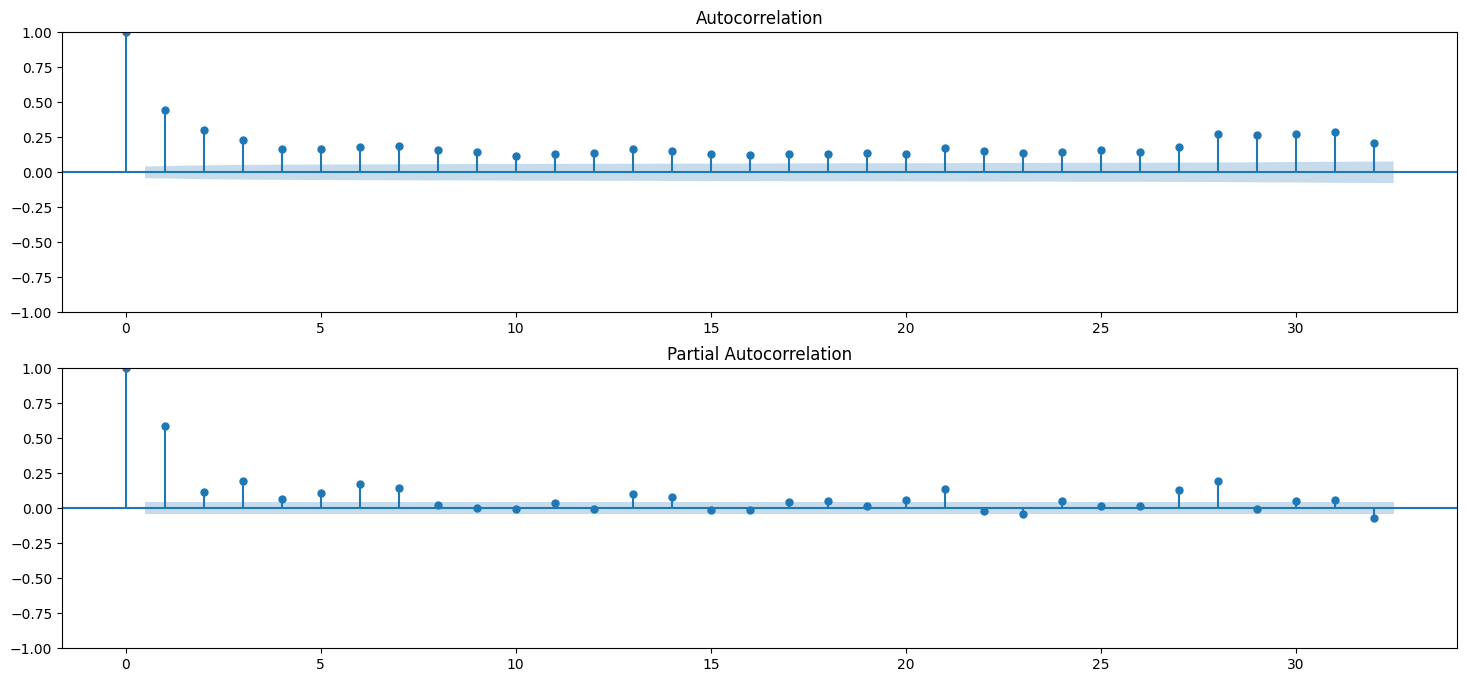

In [69]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

plt.figure(figsize=(18,8))
plt.subplot(211)
plot_acf(ts_df["Major"], lags=32, ax=plt.gca());
plt.subplot(212)
plot_pacf(ts_df["Accidents"], lags=32, ax=plt.gca());

In [ ]:
df = timeline_df.groupby(['accident_year', 'month']).agg(num=("number_of_casualties", 'sum'))

df = df.reset_index()

sns.barplot(x=['accident_year', 'month'],

            y='num',

            hue="accident_year",

            data=df)

plt.show()

In [35]:
#accidentsperyear = timeline_df.groupby(['accident_year'])['accident_index'].count()
accidentsperyear = timeline_df.groupby(['accident_year'])['date'].count()


plt.style.use('dark_background')
plt.figure(figsize = (10,5))
colors = sns.color_palette("plasma", n_colors = 7)
sns.barplot(list(accidentsperyear.index),accidentsperyear.values, palette = colors)
sns.despine(top = True, right = True, left = True, bottom = True)
plt.title("Accidents Per Year",fontsize = 20,fontweight = "bold")
plt.xlabel("\nYear", fontsize = 15, fontweight = "bold")
plt.ylabel("\nNumber of Accidents", fontsize = 15, fontweight = "bold")
plt.savefig('accidentsperyear.png')
plt.tight_layout()


TypeError: ignored

<Figure size 1000x500 with 0 Axes>

In [37]:
list(accidentsperyear.index),accidentsperyear.values

([2016, 2017, 2018, 2019, 2020, 2021],
 array([136621, 129982, 122635, 117536,  91199, 101087]))

In [ ]:
print("No. of rows: {}".format(acc_df.shape[0]))
print("No. of cols: {}".format(acc_df.shape[1]))
acc_df.head().T

No. of rows: 101087
No. of cols: 36


,8602824,8602825,8602826,8602827,8602828
accident_index,2021010287148,2021010287149,2021010287151,2021010287155,2021010287157
accident_year,2021,2021,2021,2021,2021
accident_reference,10287148,10287149,10287151,10287155,10287157
location_easting_osgr,521508.0,535379.0,529701.0,525312.0,512144.0
location_northing_osgr,193079.0,180783.0,170398.0,178385.0,171526.0
longitude,-0.246102,-0.050574,-0.136152,-0.196411,-0.388169
latitude,51.623425,51.509767,51.417769,51.490536,51.431649
police_force,1,1,1,1,1
accident_severity,3,2,2,1,3
number_of_vehicles,3,2,2,1,4


In [ ]:
acc_df['date'].sample(n=30, random_state=1)

8694097   2021-07-12
8691216   2021-01-05
8627873   2021-07-25
8606472   2021-03-26
8628980   2021-12-13
8699946   2021-10-17
8678439   2021-04-12
8640619   2021-01-07
8682658   2021-05-06
8636996   2021-08-27
8608847   2021-02-05
8682494   2021-05-21
8655102   2021-01-26
8616781   2021-08-25
8638379   2021-02-15
8690261   2021-07-10
8607309   2021-09-04
8626483   2021-11-25
8652601   2021-12-27
8655285   2021-07-05
8668092   2021-09-11
8651110   2021-10-08
8693633   2021-05-26
8679950   2021-07-21
8652524   2021-12-17
8681045   2021-11-12
8605685   2021-11-03
8645340   2021-11-30
8647090   2021-06-10
8665485   2021-06-08
Name: date, dtype: datetime64[ns]

*italicized text*# Conecting to google drive

In [ ]:
acc_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101087 entries, 8602824 to 8703910
Data columns (total 36 columns):
 #   Column                                       Non-Null Count   Dtype         
---  ------                                       --------------   -----         
 0   accident_index                               101087 non-null  object        
 1   accident_year                                101087 non-null  int64         
 2   accident_reference                           101087 non-null  object        
 3   location_easting_osgr                        101070 non-null  float64       
 4   location_northing_osgr                       101070 non-null  float64       
 5   longitude                                    101070 non-null  float64       
 6   latitude                                     101070 non-null  float64       
 7   police_force                                 101087 non-null  int64         
 8   accident_severity                            101087 non-n

In [ ]:
#Checking Target Value and its percentages 
# 1 : Fatal  2:Severe  3:Slight
print ('Number of Nan instances: ',acc_df['accident_severity'].isna().sum())
acc_df['accident_severity'].value_counts()/len(acc_df)*100

Number of Nan instances:  0


3    77.486719
2    21.055131
1     1.458150
Name: accident_severity, dtype: float64

In [ ]:
acc_df.isna().sum().sort_values(ascending=False).head()

location_easting_osgr     17
location_northing_osgr    17
longitude                 17
latitude                  17
accident_index             0
dtype: int64

In [ ]:
# remove few instances for which we don't have exact coordinates
acc_df.dropna(axis=0,inplace=True)

<Axes: >

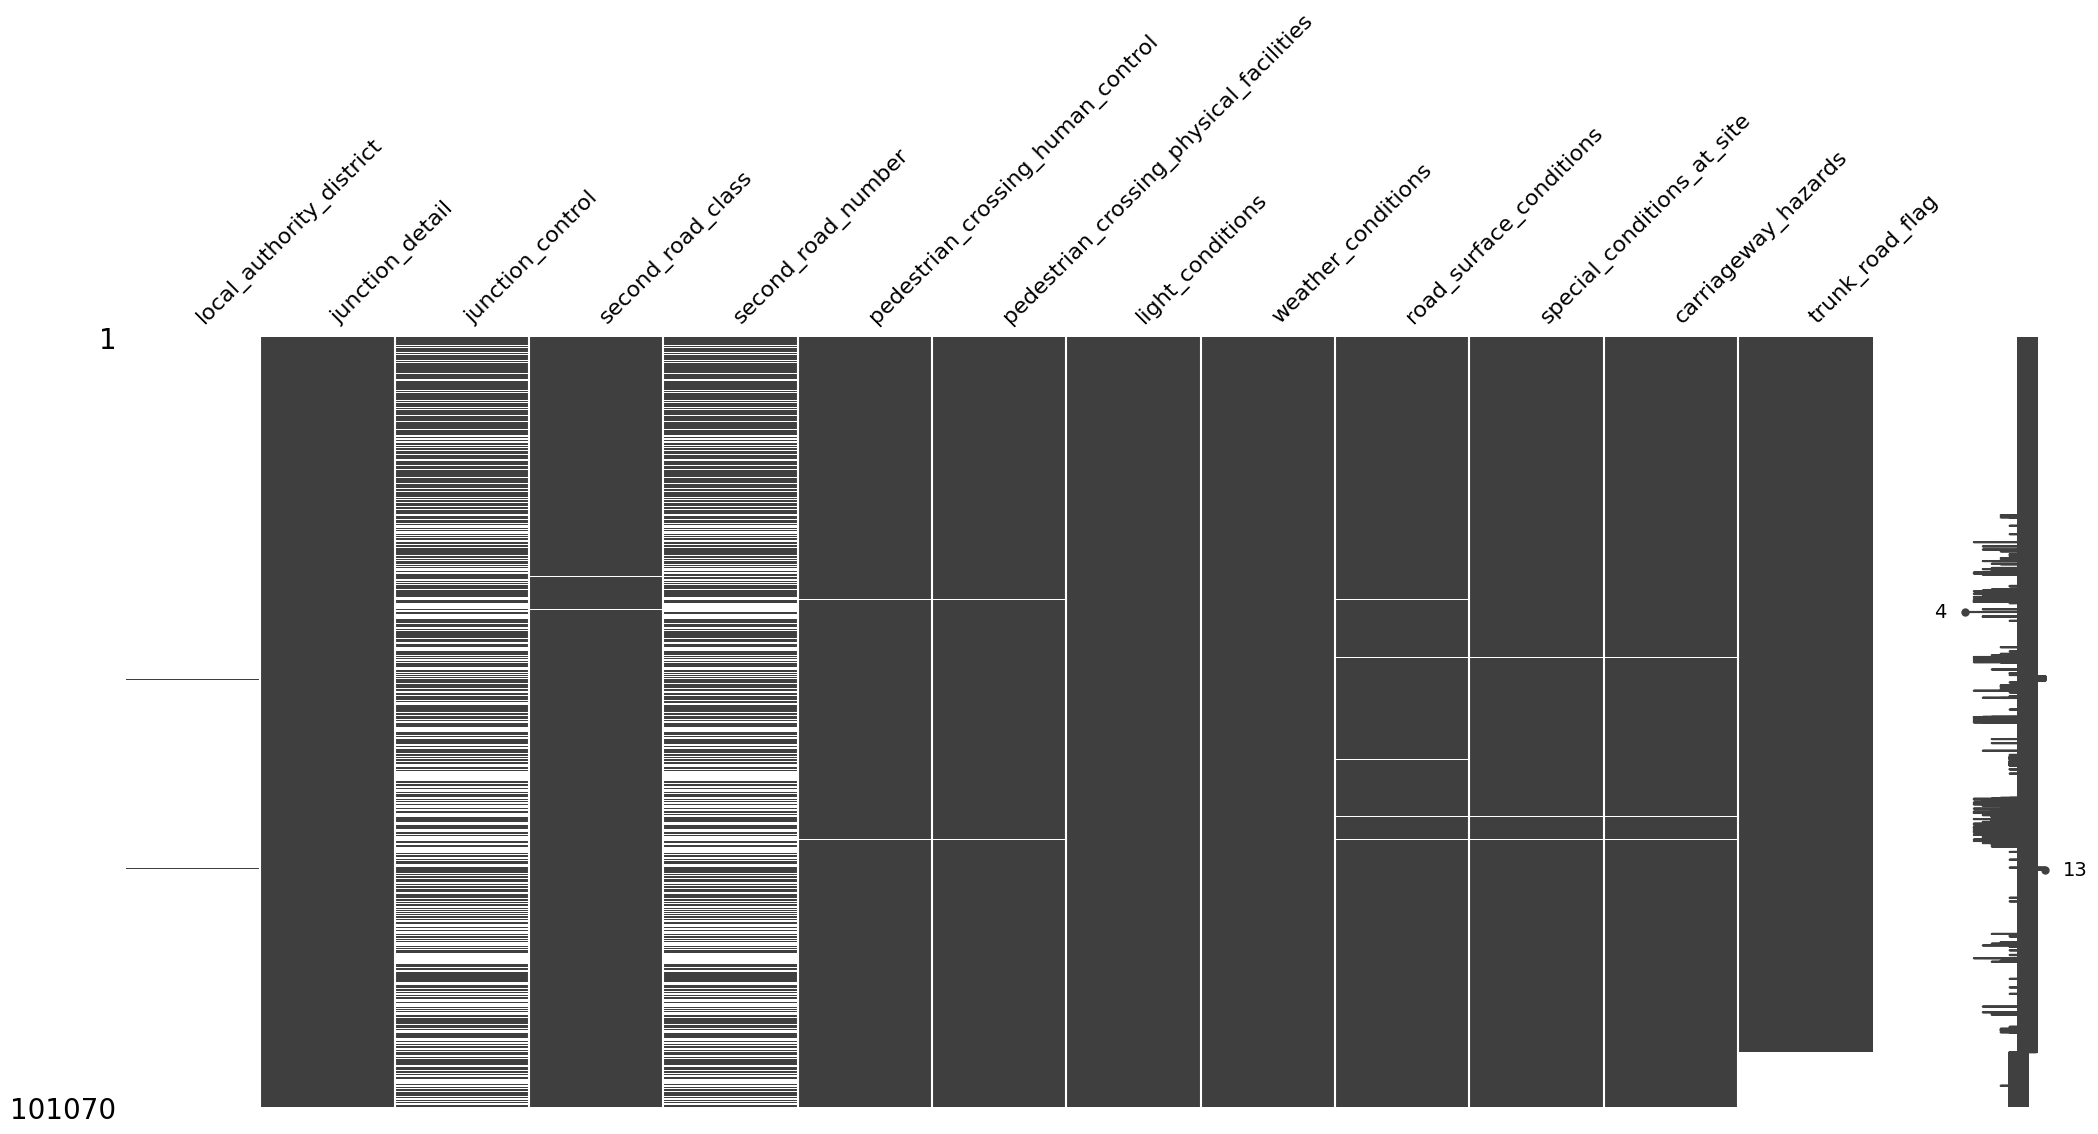

In [ ]:
#dealing with other missing values:(many categories have -1 for missing value)
#visualize missing values with msno: from https://towardsdatascience.com/code-and-techniques-for-exploratory-data-analysis-a44c50953502
#import missingno as msno #moved to import section 
acc_df.replace(-1, np.nan, inplace=True)
missingdata_df = acc_df.columns[acc_df.isnull().any()].tolist()
msno.matrix(acc_df[missingdata_df])

In [ ]:
acc_df.isna().sum().sort_values(ascending=False).head(14)

local_authority_district                   100876
junction_control                            42051
second_road_number                          41587
trunk_road_flag                              7197
road_surface_conditions                       431
special_conditions_at_site                    351
carriageway_hazards                           342
pedestrian_crossing_human_control             247
pedestrian_crossing_physical_facilities       232
second_road_class                              83
weather_conditions                             12
light_conditions                               11
junction_detail                                 2
accident_index                                  0
dtype: int64

In [ ]:
acc_df['junction_detail'][acc_df['second_road_number'].isna()].value_counts(dropna=False)

0.0     41504
3.0        26
1.0        18
9.0        12
5.0        10
8.0         7
6.0         6
7.0         2
99.0        1
2.0         1
Name: junction_detail, dtype: int64

In [ ]:
acc_df['junction_detail'][acc_df['junction_control'].isna()].value_counts(dropna=False)

0.0    41560
3.0      183
9.0      108
8.0       76
1.0       64
6.0       27
5.0       14
2.0       10
7.0        8
NaN        1
Name: junction_detail, dtype: int64

## Accident Data guide load and convert codes to text

In [ ]:
Data_info = pd.read_excel(Data_Folder_Name+'/Road-Safety-Open-Dataset-Data-Guide.xlsx')
Data_info.isnull().sum()
#print(Data_info.info())

table             0
field name        0
code/format      30
label            31
note           1458
dtype: int64

In [ ]:
mylist=['field name','code/format','label']
acc_info=Data_info[Data_info.table=='Accident'][mylist]
acc_info.info()
acc_info=acc_info[acc_info['label'].notna()]

#acc_labeler=acc_info
def acc_labels(col,df=acc_info):
    tempdf = df[['code/format','label']][df['field name']==col]
    #dict(zip(tempdf['code/format'], tempdf.label))
    #pd.Series(tempdf.label.values,index=tempdf['code/format']).to_dict()
    return tempdf.set_index('code/format').to_dict()['label']
    
    
def acc_label(col,code,df=acc_info):
    
    return df[['label']][(df['field name']==col) & (df['code/format']==code)].values[0,0]

print(acc_label('junction_detail',0))
acc_labels('junction_detail')

NameError: ignored

In [ ]:
acc_labels('junction_control')

NameError: ignored

majority of missing "junction_control" 98.8% and "second_road_number" 99.8% are at no junction as noted by junction control. with 40% missing data I don't believe we gain much more insight here so lets omit these two columns entirely

In [ ]:
acc_df=acc_df.drop(['second_road_number', 'junction_control'], axis=1)

7197 accidents in Scotland and Whales
3    65.930249
2    31.012922
1     3.056829
Name: accident_severity, dtype: float64
93873 accidents in England
3    78.375039
2    20.290179
1     1.334782
Name: accident_severity, dtype: float64
99    3902
63     954
62     952
60     780
61     609
Name: police_force, dtype: int64


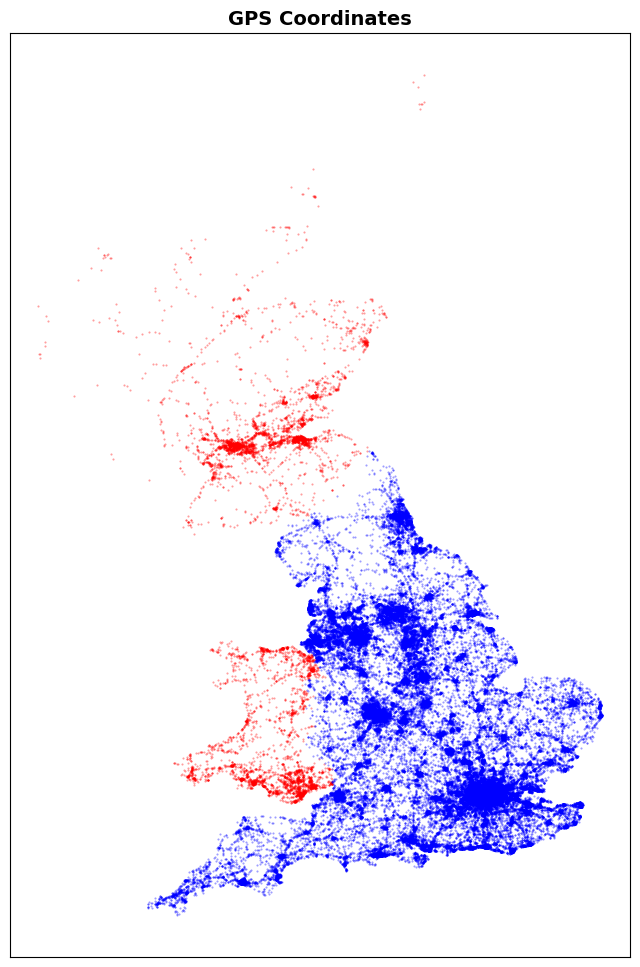

In [ ]:
cols_list = ['latitude', 'longitude', 'accident_severity', 'trunk_road_flag','police_force']
data1 = acc_df.loc[acc_df['trunk_road_flag'].isna(), cols_list]#.copy() 
data2 = acc_df.loc[acc_df['trunk_road_flag'].notna(), cols_list]#.copy() 
print(len(data1), 'accidents in Scotland and Whales')
print(data1['accident_severity'].value_counts()*100/len(data1))
print(len(data2), 'accidents in England')
print(data2['accident_severity'].value_counts()*100/len(data2))
#data['local_authority_highway'].value_counts()
print(data1['police_force'].value_counts())    # These seems to be wales and scottish roads

fig, ax2 = plt.subplots(figsize=(8,12))
ax2.scatter(data1.longitude,data1.latitude, marker='.', alpha=0.4, s=1, c='red')
ax2.scatter(data2.longitude,data2.latitude, marker='.', alpha=0.4, s=1, c='blue')

ax2.set_xticks([])
ax2.set_yticks([])
t=ax2.set_title("GPS Coordinates", fontweight='bold', fontsize=14)


As shown here the missing data in the trunk_road_flag is only referring to counties that resides in Scotland or Whales. 
As seen above, it worth mentioning that It is twice as likely to have a fatal accidents in Scotland/Whales rather than in England. and 50% morelikly to have severe accidents.

In [ ]:
acc_labels('trunk_road_flag')

{1: 'Trunk (Roads managed by Highways England)',
 2: 'Non-trunk',
 -1: 'Data missing or out of range'}

6539 England Trunk
3    78.100627
2    18.932558
1     2.966814
Name: accident_severity, dtype: float64
87334 England Non Trunk
3    78.395585
2    20.391829
1     1.212586
Name: accident_severity, dtype: float64


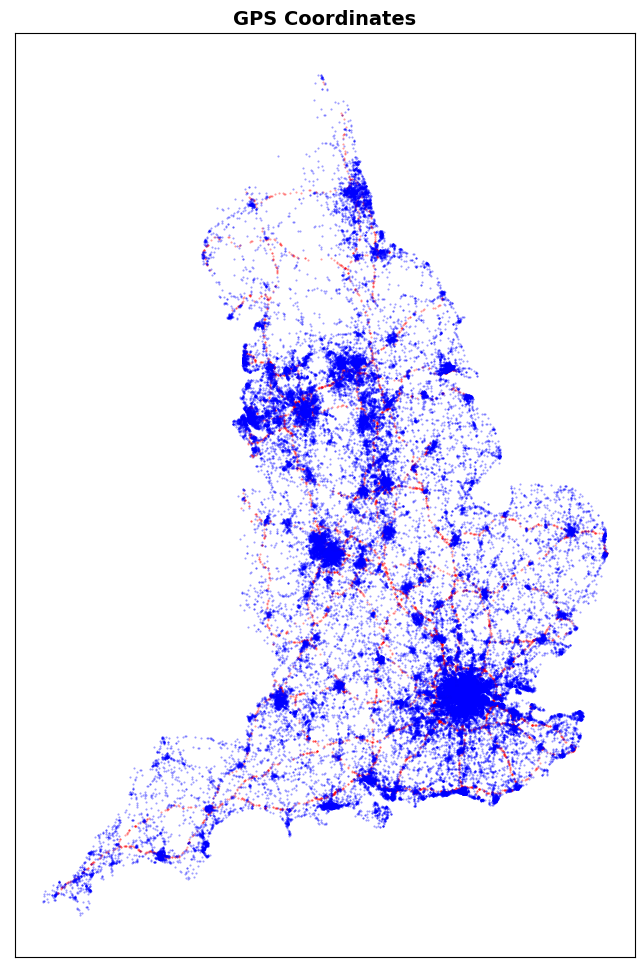

In [ ]:
data1 = acc_df.loc[acc_df['trunk_road_flag']==1, cols_list]#.copy() 
data2 = acc_df.loc[acc_df['trunk_road_flag']==2, cols_list]#.copy() 
print(len(data1), 'England Trunk')
print(data1['accident_severity'].value_counts()*100/len(data1))
print(len(data2), 'England Non Trunk')
print(data2['accident_severity'].value_counts()*100/len(data2))
#data['local_authority_highway'].value_counts()

fig, ax2 = plt.subplots(figsize=(8,12))
ax2.scatter(data1.longitude,data1.latitude, marker='.', alpha=0.4, s=1, c='red')
ax2.scatter(data2.longitude,data2.latitude, marker='.', alpha=0.4, s=1, c='blue')

ax2.set_xticks([])
ax2.set_yticks([])
t=ax2.set_title("GPS Coordinates", fontweight='bold', fontsize=14)


In [ ]:
#we replace the -1 trunk values that are for whales and scotland regions to 0 
acc_df['trunk_road_flag'].fillna(0,inplace = True)
acc_df['trunk_road_flag'].value_counts()

2.0    87334
0.0     7197
1.0     6539
Name: trunk_road_flag, dtype: int64

# P.S.  add trunk_road_flag=0 Scot and Whales road to guide excel file

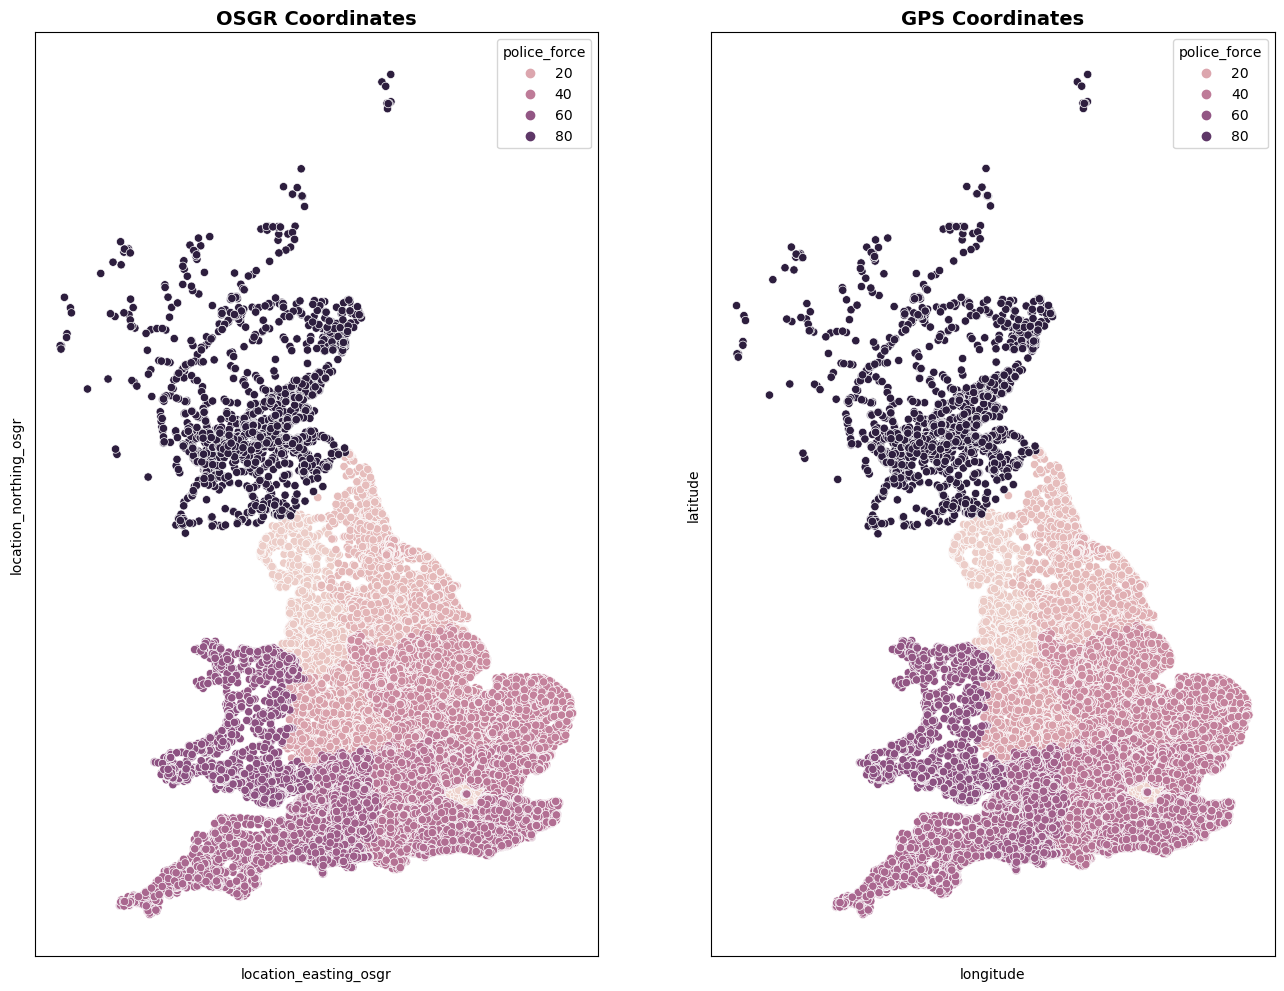

In [ ]:
cols_list = ['latitude', 'longitude', 'location_easting_osgr', 'location_northing_osgr','police_force']
data = acc_df[cols_list].copy()

fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16,12))
#ax1.scatter(acc_df.location_easting_osgr,acc_df.location_northing_osgr, marker='.', alpha=0.4, s=1, c='blue')
sns.scatterplot(x='location_easting_osgr', y='location_northing_osgr', hue='police_force', data=data, ax=ax1) 
ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_title("OSGR Coordinates", fontweight='bold', fontsize=14)
#ax2.scatter(acc_df.longitude,acc_df.latitude, marker='.', alpha=0.4, s=1, c='red')
sns.scatterplot(x='longitude', y='latitude', hue='police_force', data=data, ax=ax2) 
ax2.set_xticks([])
ax2.set_yticks([])
t=ax2.set_title("GPS Coordinates", fontweight='bold', fontsize=14)


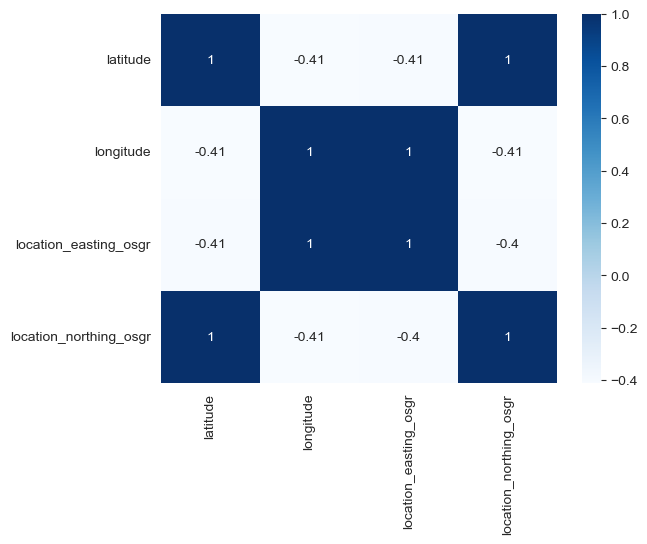

In [ ]:
#data=data.drop(axis=1,columns=['police_force'])
corr = data.corr()
sns.heatmap(corr, cmap="Blues", annot=True)
acc_df = acc_df.drop(axis=1,columns=['location_easting_osgr','location_northing_osgr'])

In [ ]:
acc_df.describe().T

,count,mean,std,min,25%,50%,75%,max
accident_year,101070.0,2021.000000,0.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000
longitude,101070.0,-1.204951,1.357913,-7.486852,-2.116694,-1.087226,-0.127483,1.755955
latitude,101070.0,52.355819,1.307057,49.980835,51.462397,51.789613,53.334320,60.500008
police_force,101070.0,27.055249,24.235613,1.000000,4.000000,21.000000,44.000000,99.000000
accident_severity,101070.0,2.760315,0.459768,1.000000,3.000000,3.000000,3.000000,3.000000
number_of_vehicles,101070.0,1.844346,0.680327,1.000000,1.000000,2.000000,2.000000,13.000000
number_of_casualties,101070.0,1.268319,0.674581,1.000000,1.000000,1.000000,1.000000,22.000000
day_of_week,101070.0,4.138755,1.941047,1.000000,2.000000,4.000000,6.000000,7.000000
local_authority_district,194.0,336.778351,114.274677,240.000000,241.000000,245.000000,472.000000,480.000000
first_road_class,101070.0,4.204769,1.464214,1.000000,3.000000,4.000000,6.000000,6.000000


In [ ]:
card_acc = acc_df.nunique()
card_acc

accident_index                                 101070
accident_year                                       1
accident_reference                             101070
longitude                                       99035
latitude                                        98036
police_force                                       44
accident_severity                                   3
number_of_vehicles                                 13
number_of_casualties                               12
date                                              365
day_of_week                                         7
time                                             1440
local_authority_district                           14
local_authority_ons_district                      378
local_authority_highway                           206
first_road_class                                    6
first_road_number                                3099
road_type                                           6
speed_limit                 

In [ ]:
acc_df.describe(include=object).T

,count,unique,top,freq
accident_index,101070,101070,2021010287148,1
accident_reference,101070,101070,10287148,1
time,101070,1440,17:00,914
local_authority_ons_district,101070,378,E08000025,2137
local_authority_highway,101070,206,E10000016,3250
lsoa_of_accident_location,101070,26581,-1,3902


local_authority_district  and lsoa_of_accident_location can be omitted 
the former is much similar to local_authority_ons_district  and has essentially have missing values all over except a few.
the latter is too much high cardinality that is not informative.

In [ ]:
acc_df = acc_df.drop(axis=1,columns=['local_authority_district','location_northing_osgr'])

## we could still remove more location based data for ML part  ?
as the aim is not name of the district. but we have to choose based on which location info is a better indicator

<AxesSubplot: xlabel='police_force'>

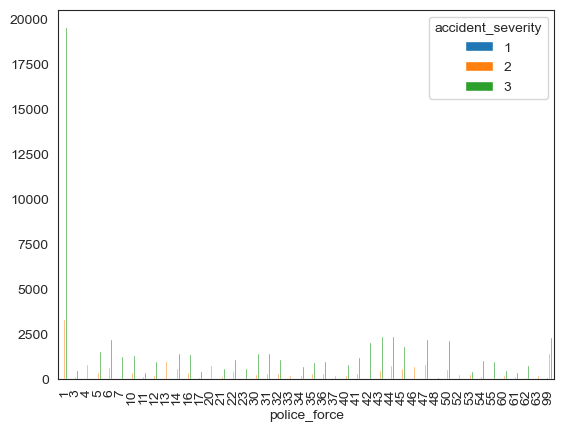

In [ ]:
acc_df.groupby(['police_force', 'accident_severity']).agg('size').unstack().plot(kind = 'bar', legend=True)

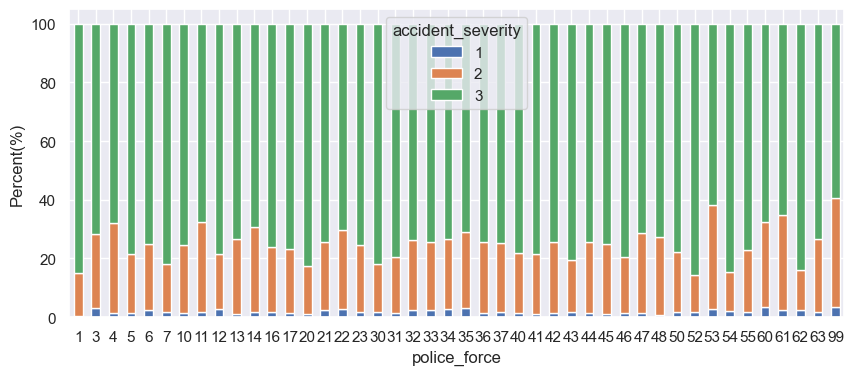

In [ ]:
dfc = pd.crosstab(acc_df['police_force'], acc_df['accident_severity'], normalize='index').mul(100).round(2)
ax = dfc.plot(kind='bar', ylabel='Percent(%)', stacked=True, rot=0, figsize=(10, 4))

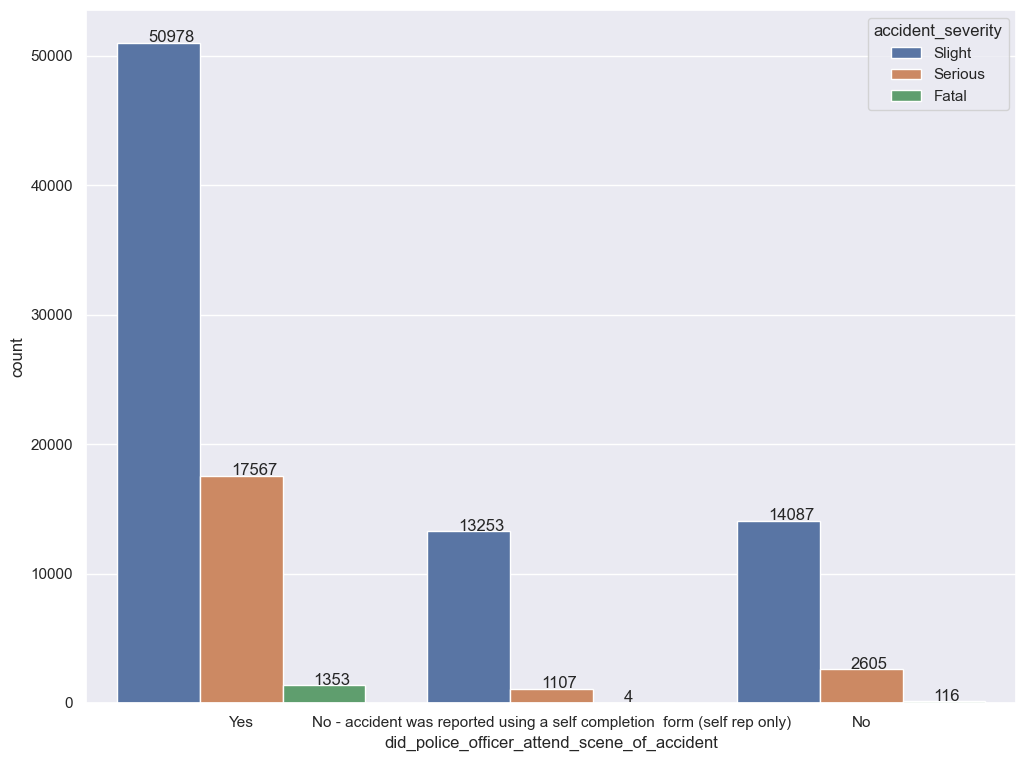

In [ ]:
data["did_police_officer_attend_scene_of_accident"] = acc_df["did_police_officer_attend_scene_of_accident"].replace(
    acc_labels("did_police_officer_attend_scene_of_accident"))
data["accident_severity"] = acc_df["accident_severity"].replace(
    acc_labels("accident_severity"))
sns.set(rc={'figure.figsize':(12,9)})
ax=sns.countplot(x='did_police_officer_attend_scene_of_accident', hue='accident_severity', data=data)
for p in ax.patches:
        patch_height = p.get_height()
        if np.isnan(patch_height):
            patch_height = 0
        ax.annotate('{}'.format(int(patch_height)), (p.get_x()+0.1, patch_height+50))
plt.show()

In [ ]:
data.head()

,latitude,longitude,location_easting_osgr,location_northing_osgr,did_police_officer_attend_scene_of_accident,accident_severity
8602824,51.623425,-0.246102,521508.0,193079.0,Yes,Slight
8602825,51.509767,-0.050574,535379.0,180783.0,Yes,Serious
8602826,51.417769,-0.136152,529701.0,170398.0,Yes,Serious
8602827,51.490536,-0.196411,525312.0,178385.0,Yes,Fatal
8602828,51.431649,-0.388169,512144.0,171526.0,Yes,Slight


In [ ]:
data.groupby(['did_police_officer_attend_scene_of_accident', 'accident_severity'])
groupped_data = data.groupby(['did_police_officer_attend_scene_of_accident','accident_severity']).agg({'accident_severity': 'size'})
#groupped_data["%"] = groupped_data.apply(lambda x:  100*x / x.sum())
groupped_data["%"] = groupped_data.groupby(level=0).apply(
     lambda x:  100*x / x.sum()
)
groupped_data.unstack()
#data.head()


/var/folders/d0/854ddzys4c59tpq5bcs8p2sr0000gn/T/ipykernel_99629/2725779277.py:4: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  groupped_data["%"] = groupped_data.groupby(level=0).apply(


accident_severity          \
accident_severity                                              Fatal Serious   
did_police_officer_attend_scene_of_accident                                    
No                                                               116    2605   
No - accident was reported using a self complet...                 4    1107   
Yes                                                             1353   17567   

                                                                  %  \
accident_severity                                  Slight     Fatal   
did_police_officer_attend_scene_of_accident                           
No                                                  14087  0.690148   
No - accident was reported using a self complet...  13253  0.027847   
Yes                                                 50978  1.935678   

                                                                          
accident_severity                                     Serious     Slight  
did_police_officer_attend_scene_of_accident                               
No                                                  15.498572  83.811280  
No - accident was reported using a self complet...   7.706767  92.265386  
Yes                                                 25.132336  72.931987

In [ ]:
print(data['accident_severity'].value_counts()*100/len(data))


Slight     77.488869
Serious    21.053725
Fatal       1.457406
Name: accident_severity, dtype: float64


In [ ]:
data.groupby('accident_severity').agg(
    {'did_police_officer_attend_scene_of_accident' : lambda x: sum(x)/len(data)*100})

/var/folders/d0/854ddzys4c59tpq5bcs8p2sr0000gn/T/ipykernel_99629/2698628511.py:1: FutureWarning: Dropping invalid columns in SeriesGroupBy.agg is deprecated. In a future version, a TypeError will be raised. Before calling .agg, select only columns which should be valid for the function.
  data.groupby('accident_severity').agg(


TypeError: unsupported operand type(s) for +: 'int' and 'str'

In [ ]:
apply(lambda x: x*100/sum(x), axis=1)

ValueError: could not convert string to float: 'A'